In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

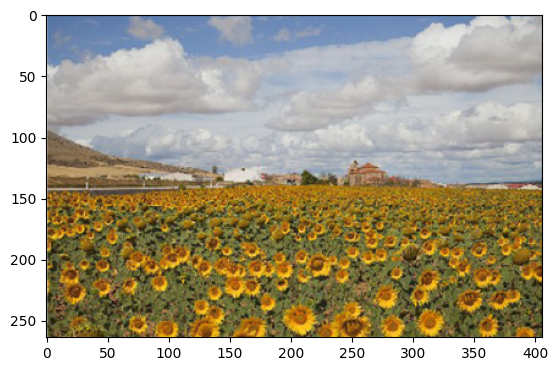

In [6]:
im_bgr = cv2.imread('sunflowers.png')
im_bgr.shape  
plt.imshow(im_bgr[:,:,::-1])

In [11]:
z = im_bgr.reshape((-1,3))  # Kmean 는 영상전용이 아니므로 
# 숙제로 => 위치 정보를 넣도록 함. 
z[0,:]

array([254, 253, 253], dtype=uint8)

In [14]:
Z = np.float32(z)
Z[0,:]

array([254., 253., 253.], dtype=float32)

In [15]:
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3  # K-means
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS) # 10 번을 수행해서.. 제일좋은 결과 리턴 

In [18]:
ret, label[:10], center

(192459291.6584294,
 array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=int32),
 array([[ 42.609264, 129.34366 , 169.769   ],
        [186.92737 , 178.38425 , 172.94292 ],
        [ 41.322727,  86.101585,  99.88437 ]], dtype=float32))

In [20]:
center = np.uint8(center)
center

array([[ 42, 129, 169],
       [186, 178, 172],
       [ 41,  86,  99]], dtype=uint8)

In [21]:
label.shape

(107184, 1)

In [23]:
x = label.flatten()
x.shape

(107184,)

In [25]:
x[1], center[x[0]]

(1, array([186, 178, 172], dtype=uint8))

In [26]:
res = center[label.flatten()]

In [27]:
res.shape, res.dtype

((107184, 3), dtype('uint8'))

In [29]:
im_seg_k3 = res.reshape((im_bgr.shape))

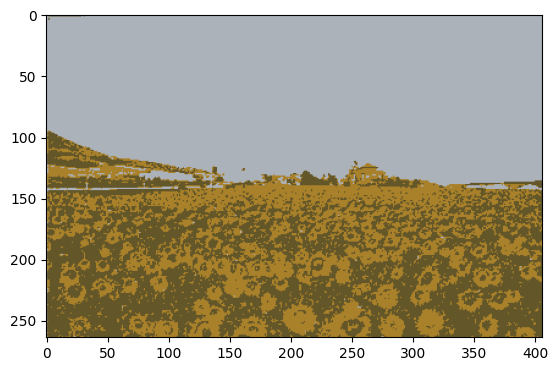

In [31]:
plt.imshow(im_seg_k3[:,:,::-1])

In [33]:
d = x.reshape(im_bgr.shape[:2])

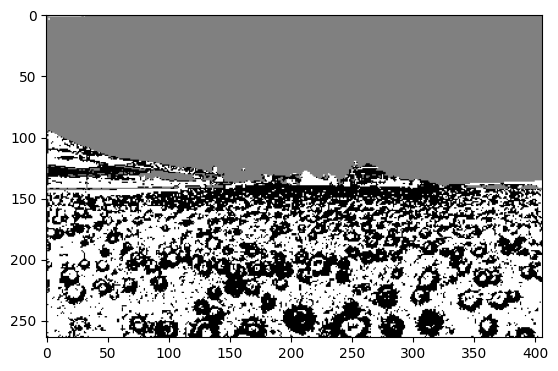

In [34]:
plt.imshow(d, cmap ="gray")

label (107184, 1)
center (7, 3)


(<Axes: title={'center': 'k=15'}>,
 (-0.5, 405.5, 263.5, -0.5),
 Text(0.5, 1.0, 'k=15'))

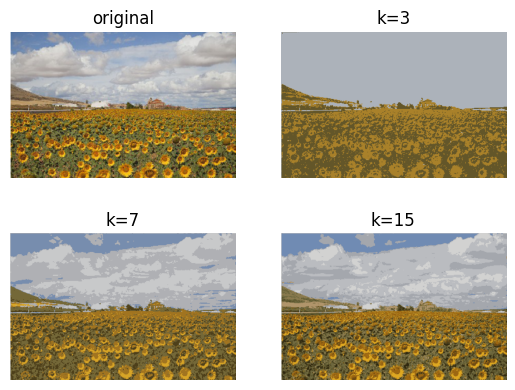

In [35]:
K = 7  # K-means
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
#  현재 예에서는 별로의미가 없음.
center = np.uint8(center)
print("label", label.shape)
print("center", center.shape)
res = center[label.flatten()] 
# 이미지로 변환 
im_seg_k7 = res.reshape((im_bgr.shape))


K = 15  # K-means
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
#  현재 예에서는 별로의미가 없음.
center = np.uint8(center)
res = center[label.flatten()] 
# 이미지로 변환 
im_seg_k15 = res.reshape((im_bgr.shape))
 
plt.subplot(2,2,1), plt.imshow(im_bgr[:,:,::-1]), plt.axis('off'), plt.title('original')
plt.subplot(2,2,2),plt.imshow(im_seg_k3[:,:,::-1]), plt.axis('off'), plt.title('k=3')
plt.subplot(2,2,3), plt.imshow(im_seg_k7[:,:,::-1]), plt.axis('off'), plt.title('k=7')
plt.subplot(2,2,4), plt.imshow(im_seg_k15[:,:,::-1]), plt.axis('off'), plt.title('k=15')